# 09. 시계열 데이터 전처리

1. 시계열 데이터 종류
    - Date time: 특정 날짜와 시간
    - Time Delta : 절대적 기간
    - Time span : 한 시점과 빈도로 정의된 기간
    - Date offset : 달력상의 계산을 하는 상대적 기간

In [4]:
import pandas as pd

pd.NaT == pd.NaT # False
pd.NaT != pd.NaT # True

True

2. `to_datetime`

**UTC를 기준으로 하는 습관을 꼭 들이자**

In [8]:
df = pd.to_datetime({'year': [2020, 2021],
                 'month': [1, 2],
                 'day': [1, 2]})

pd.to_datetime(df)

0   2020-01-01
1   2021-02-02
dtype: datetime64[ns]

In [12]:
pd.to_datetime(1942540234905) # 기본 단위는 나노초
pd.to_datetime(1942540234905, unit='ns') # 나노초 단위로 변환

Timestamp('1970-01-01 00:32:22.540234905')

In [13]:
pd.to_datetime(['2018-01-01 12:00 -0500', '2018-01-02 12:00 -0500'],
               utc=True) # UTC로 변환

DatetimeIndex(['2018-01-01 17:00:00+00:00', '2018-01-02 17:00:00+00:00'], dtype='datetime64[ns, UTC]', freq=None)

3. `date_range`

In [ ]:
print(pd.date_range('2018-01-01', '2018-01-05', freq='D')) # 날짜 범위 생성
print(pd.date_range('2018-01-01', '2018-01-05', freq='2D')) # 날짜 범위 생성
print(pd.date_range('2018-01-01', '2018-01-02', freq='h')) # 날짜 범위 생성
print(pd.date_range('2018-01-01', '2018-01-02', freq='ms')) # 날짜 범위 생성

4. `bdate_range`

- weekmask : str.None is 'Mon Tue Wed Thu Fri'
- holidays: list-like

In [23]:
import datetime

weekmask = "Mon Wed Fri"
holidays = [datetime.datetime(2018, 1, 1), datetime.datetime(2018, 3, 2)]
print(pd.bdate_range('2018-01-01', '2018-01-10',freq="C", weekmask=weekmask, holidays=holidays)) # 영업일 범위 생성

DatetimeIndex(['2018-01-03', '2018-01-05', '2018-01-08', '2018-01-10'], dtype='datetime64[ns]', freq='C')


4. 인덱싱

- timestamp로 파싱 가능한 string으로 Indexing/Slicing 가능

In [28]:
import numpy as np


start = datetime.datetime(2025, 1, 1)
end = datetime.datetime(2025, 12, 31)
rng = pd.date_range(start,end, freq="BME")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts[::2].index)
print(ts['5/30/2025'])
print(ts[datetime.datetime(2025,11,15):])

DatetimeIndex(['2025-01-31', '2025-03-31', '2025-05-30', '2025-07-31',
               '2025-09-30', '2025-11-28'],
              dtype='datetime64[ns]', freq='2BME')
0.4779590541034477
2025-11-28   -0.303923
2025-12-31    0.550239
Freq: BME, dtype: float64


5. 부분 문자열 인덱싱



6. Resampling

7. shift

8. Rolling & Resampling

    - Rolling
        - 주식 주간차트처럼 고정된 크기의 윈도우를 순차적으로 이동하며 데이터를 분석함.
        - 즉, 범위를 지정해서 해당 범위단위로 계산을 진행함


    | 항목                   | 정수 기반 (`window=2`)     | 시간 기반 (`window='2s'`)      |
    | :--------------------: | :----------------------: | :--------------------------: |
    | **윈도우 의미**           | 고정된 **행 개수 기준** 윈도우    | 시계열 기준 **지정 시간 범위** 윈도우    |
    | **사용 조건**            | 일반 인덱스(정렬되어 있어야 함)     | `DatetimeIndex` 필수         |
    | **기본 `min_periods`** | `window`와 동일 (예: 2)    | `1`                        |
    | **포함되는 데이터 수**       | 항상 `window` 개수         | 데이터 밀도에 따라 **유동적**         |
    | **NaN 발생 시점**        | `min_periods` 미만이면 NaN | `min_periods=1`이므로 대부분 계산됨 |

In [41]:
df_time = pd.DataFrame({"B": [0,1,2,np.nan,4]}, index=[pd.Timestamp('20250101 09:00:00'),
                                                    pd.Timestamp('20250101 09:00:02'),
                                                    pd.Timestamp('20250101 09:00:03'),
                                                    pd.Timestamp('20250101 09:00:05'),
                                                    pd.Timestamp('20250101 09:00:06')])

print('윈도우 값이 2인 경우')
print(df_time.rolling(2).sum())
print()
print('윈도우 값이 2s인 경우')
print(df_time.rolling('2s').sum())

윈도우 값이 2인 경우
                       B
2025-01-01 09:00:00  NaN
2025-01-01 09:00:02  1.0
2025-01-01 09:00:03  3.0
2025-01-01 09:00:05  NaN
2025-01-01 09:00:06  NaN

윈도우 값이 2s인 경우
                       B
2025-01-01 09:00:00  NaN
2025-01-01 09:00:02  NaN
2025-01-01 09:00:03  3.0
2025-01-01 09:00:05  NaN
2025-01-01 09:00:06  NaN


In [46]:
df_time = pd.DataFrame({"B": [0,1,2,np.nan,4]}, index=[pd.Timestamp('20250101 09:00:00'),
                                                    pd.Timestamp('20250101 09:00:02'),
                                                    pd.Timestamp('20250101 09:00:03'),
                                                    pd.Timestamp('20250101 09:00:05'),
                                                    pd.Timestamp('20250101 09:00:06')])

print('윈도우 값이 2s인 경우')
print(df_time.rolling('2s').sum())
print()
print('윈도우 값이 2s인 경우, center=True')
print(df_time.rolling('2s', center=True).sum())

윈도우 값이 2s인 경우
                       B
2025-01-01 09:00:00  0.0
2025-01-01 09:00:02  1.0
2025-01-01 09:00:03  3.0
2025-01-01 09:00:05  NaN
2025-01-01 09:00:06  4.0

윈도우 값이 2s인 경우, center=True
                       B
2025-01-01 09:00:00  0.0
2025-01-01 09:00:02  3.0
2025-01-01 09:00:03  2.0
2025-01-01 09:00:05  4.0
2025-01-01 09:00:06  4.0


    - expanding
        - 계산에 사용되는 데이터의 범위가 시작부터 현재 시점까지 점진적으로 늘어나는 방식
        - 윈도우 크기를 점차 확장하며 데이터를 분석하는 방법
        - 누적 평균(Cumulative Mean) 또는 누적 합계(Cumulative Sum) 계산이 주로 사용


9. 시계열 분해
    - 시계열 데이터를 구성하는 요소들을 분리, 각 요소의 특성을 파악하고 예측 모델의 정확도를 높이기 위해 사용
    
    - 분해요소: 추세(Trend), 주기성/순환성(Cycle), 계절성(Seasonality), 불규칙성(Irregularity)
    
    - 분해 방법:
        | 항목         | **가법 모델 (Additive)**      | **승법 모델 (Multiplicative)** |
        | ---------- | ------------------------- | -------------------------- |
        | **수식**     | Y(t) = T(t) + S(t) + R(t) | Y(t) = T(t) × S(t) × R(t)  |
        | **전제 조건**  | **변동 폭이 일정**할 때 적합        | **변동 폭이 수준에 따라 달라질 때** 적합  |
        | **패턴 예시**  | 계절성이나 추세가 일정한 폭           | 값이 클수록 계절 변화도 더 큼          |
        | **그래프 예시** | 선형적으로 출렁이는 그래프            | 곱셈적으로 출렁이는 그래프 (확장/수축)     |

    - 📊 시각적 예시
        가법 모델

        예: 아이스크림 매출이 매년 여름마다 정확히 500개 증가

        승법 모델

        예: 매출이 늘어날수록 여름철 매출이 1.5배 증가

9.1. 가법 모델 예시

C:\Users\User\AppData\Local\Temp\ipykernel_15280\333518913.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2000-01', periods=120, freq='M')  # 10년치 월별 데이터


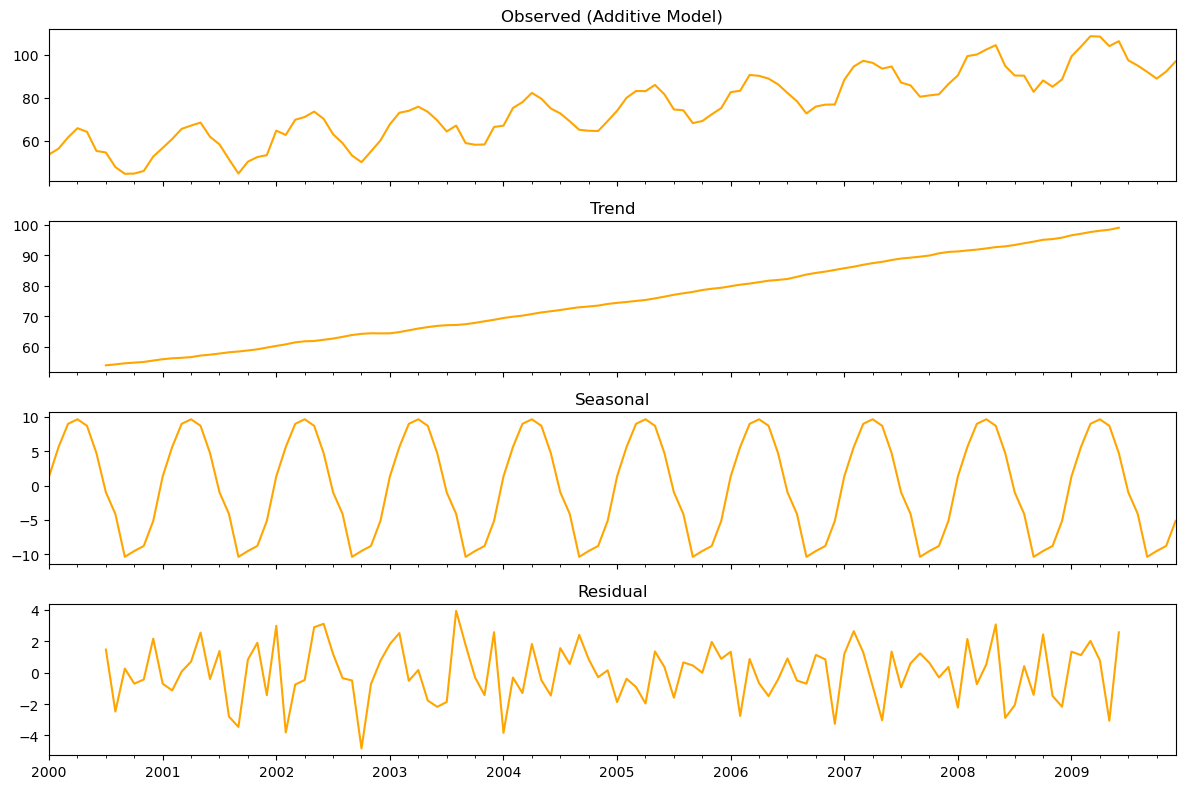

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. 데이터 생성 (가법 패턴)
np.random.seed(0)
months = pd.date_range(start='2000-01', periods=120, freq='M')  # 10년치 월별 데이터
trend = np.linspace(50, 100, 120)  # 선형 추세
seasonality = 10 * np.sin(2 * np.pi * np.arange(120) / 12)  # 일정한 진폭의 계절성 (1년 주기)
noise = np.random.normal(0, 2, 120)  # 잡음
additive_series = trend + seasonality + noise  # 가법 모델: Y = T + S + R

# 2. DataFrame 구성
df = pd.DataFrame({'Value': additive_series}, index=months)

# 3. 시계열 분해
decomp = sm.tsa.seasonal_decompose(df['Value'], model='additive', period=12)

# 4. 시각화
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomp.observed.plot(ax=axes[0], title='Observed (Additive Model)', color='orange')
decomp.trend.plot(ax=axes[1], title='Trend', color='orange')
decomp.seasonal.plot(ax=axes[2], title='Seasonal', color='orange')
decomp.resid.plot(ax=axes[3], title='Residual', color='orange')

plt.tight_layout()
plt.show()


9.2. 승법 모델 예시

C:\Users\User\AppData\Local\Temp\ipykernel_15280\4022606959.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='1950-01', periods=120, freq='M')  # 10년치 월별 데이터


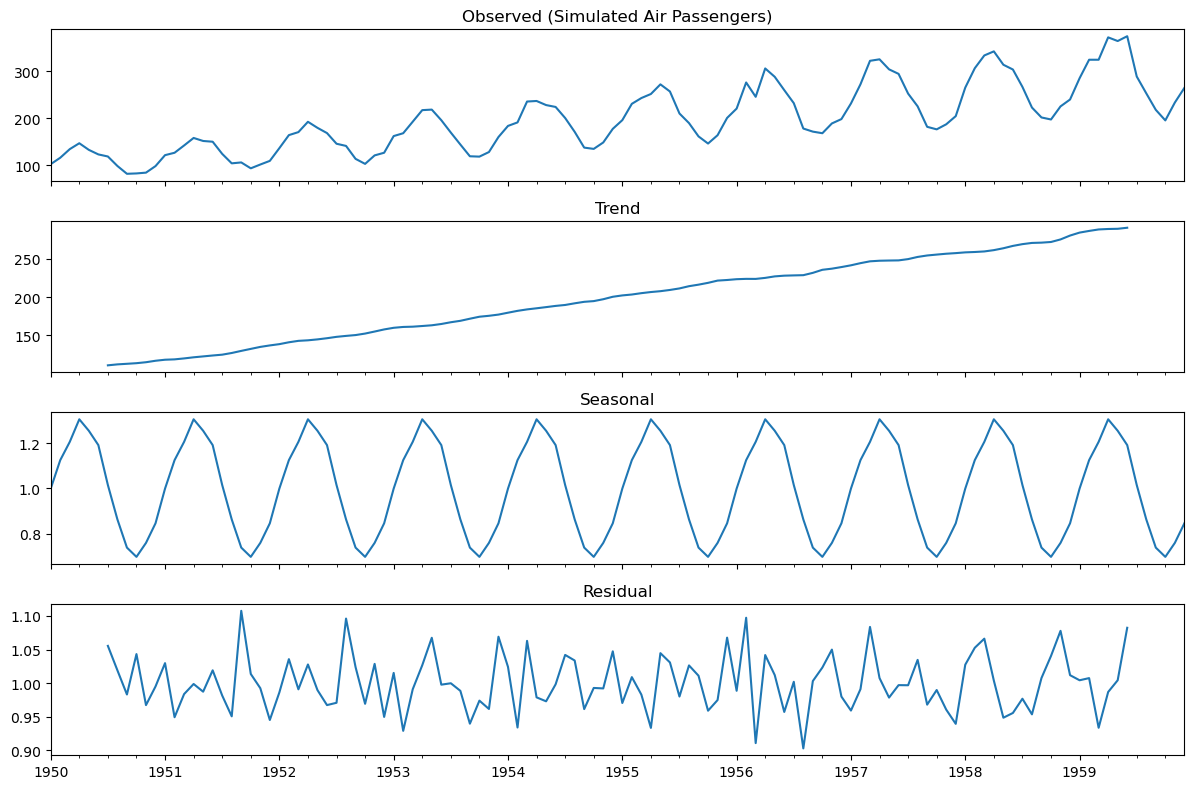

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 항공 승객 수 가상 데이터 생성 (승법적 패턴)
np.random.seed(42)
months = pd.date_range(start='1950-01', periods=120, freq='M')  # 10년치 월별 데이터
trend = np.linspace(100, 300, 120)
seasonality = 1 + 0.3 * np.sin(2 * np.pi * np.arange(120) / 12)
noise = np.random.normal(loc=1, scale=0.05, size=120)
passengers = trend * seasonality * noise

# 시계열 데이터프레임 구성
df = pd.DataFrame({'Passengers': passengers}, index=months)

# 승법 모델로 분해
decomp = sm.tsa.seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

# 시각화
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomp.observed.plot(ax=axes[0], title='Observed (Simulated Air Passengers)')
decomp.trend.plot(ax=axes[1], title='Trend')
decomp.seasonal.plot(ax=axes[2], title='Seasonal')
decomp.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()

plt.show()


지금 그래프에서 Seasonal이 ‘가법처럼’ 보이는 건 단지 진동이 일정하기 때문이지, 실제론 평균이 1을 중심으로 움직이고 있어 승법적입니다.

가법 모델이었다면 Seasonal은 **0 부근에서 상하 진동**했을 거예요.